# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [188]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [189]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [190]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [191]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [192]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [193]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [194]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [195]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [196]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [197]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [198]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position       Team  GF  GA Points
count         4          4   4   4      4
unique        4          4   3   4      4
top           1  Feyenoord  75  25     78
freq          1          1   2   1      1


In [199]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [200]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [201]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [202]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [203]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [204]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [205]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# combine the drug_response and gene_expression
combined_df = drug_response.join(gene_expression.iloc[:, 0:], how='left')
combined_df = combined_df.reset_index()
combined_df = combined_df.rename(columns={combined_df.columns[0]: 'Cell line'})

# features are all columns to the right of 'YM155' (these are the gene expressions)
X = combined_df.iloc[:, 2:]
y = combined_df['YM155']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The combined dataframe:")
print(combined_df.head())

# Use a pipeline to standardize the data, then train the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=50000))
])

parameters = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['lasso__alpha']
print(f"\nBest alpha: {best_alpha}")

The combined dataframe:
   Cell line  YM155      TFPI    TFAP2B      MGST1     PRSS3      ISL1  \
0     949176   0.42  7.166555  2.795512   7.917741  9.466787  8.436305   
1     749714  -4.31  9.084584  2.693997  12.199084  2.975566  3.479229   
2     749709  -4.80  7.409983  3.034927  11.597315  3.100007  2.993368   
3    1660034  -0.88  3.366363  2.850566  10.101420  3.422998  4.553985   
4    1240123   1.82  3.622246  3.004234  10.139788  6.627779  3.268149   

      SNAI2   SERPINB1        VIM  ...     PSMB8     HSPA1A   SERPINB5  \
0  9.500610   7.380575  13.073855  ...  4.338325   3.193308   3.231940   
1  8.489317   8.500992   5.631460  ...  9.492377  11.628330   7.902180   
2  9.676350   9.491955   9.558949  ...  9.511871  10.993441   7.528199   
3  4.206307  10.670574   3.309632  ...  8.228828   4.561736  10.573551   
4  3.752552  10.565739   3.138711  ...  8.505643   2.932354   3.448589   

      MLLT11  AKR1B10P1       UCA1   MIR205HG      PHGR1      HLA-B     SEPP1  
0  10.

## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#dbcbcbff'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p><font color='#dbcbcbff'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>


In [26]:
best_lasso = grid_search.best_estimator_.named_steps['lasso']
selected_features = X.columns[best_lasso.coef_ != 0]
print(selected_features)


Index(['CDH17', 'ABCB1'], dtype='object')


With the alpha chosen by cross-validation (alpha = 1), Lasso selected two features, CDH17 and ABCB1.

*Answer*
The partition into training and validation sets does play a role in the selection of the hyperparameter. Cross-validation depends on different splits of the data to estimate the error for each alpha value, and the outcome of this process may vary with the way the data are divided. A slightly different partition can therefore lead to a different optimal alpha, which in turn influences the number of features that are kept or shrunk to zero. Therefore stability should be assessed across multiple partitions.

The intercept should not be shrunk to zero in Lasso or Ridge regression. Its role is to adjust the vertical position of the regression line so that the model correctly reflects the average level of the response variable. Unlike the coefficients for the features, the intercept does not contribute to model complexity, so penalizing it would only distort predictions by introducing bias. For this reason, regularization methods typically leave the intercept unpenalized, as is the case in scikit-learn’s implementation

## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#f2c9c9ff'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

In [208]:
alpha_grid   = np.logspace(-3, 3, 20)
n_boot       = 100
random_state = 123
max_iter     = 50_000

# Beste alpha via CV
pipe = Pipeline([("scaler", StandardScaler()),
                 ("lasso",  Lasso(max_iter=max_iter))])
gs = GridSearchCV(pipe, {"lasso__alpha": alpha_grid},
                  scoring="neg_mean_squared_error", cv=5)
gs.fit(X_train, y_train)
best_alpha = gs.best_params_["lasso__alpha"]

# Bias–variance via bootstrap (alleen nodig)
def bootstrap_bias_variance_min(X, y, alphas, n_boot=100, random_state=42):
    X = np.asarray(X); y = np.asarray(y)
    rng = np.random.default_rng(random_state)

    # Referentie op alle data met best_alpha
    ref = Pipeline([("scaler", StandardScaler()),
                    ("lasso",  Lasso(alpha=best_alpha, max_iter=max_iter))])
    ref.fit(X, y)
    ref_coef = ref.named_steps["lasso"].coef_

    mean_bias_sq, mean_var = [], []

    for a in alphas:
        coefs_b = np.empty((n_boot, X.shape[1]))
        for b in range(n_boot):
            idx = rng.choice(X.shape[0], size=X.shape[0], replace=True)
            m = Pipeline([("scaler", StandardScaler()),
                          ("lasso",  Lasso(alpha=a, max_iter=max_iter))])
            m.fit(X[idx], y[idx])
            coefs_b[b] = m.named_steps["lasso"].coef_

        mean_coef = coefs_b.mean(axis=0)
        var_coef  = coefs_b.var(axis=0, ddof=0)
        bias_sq   = (mean_coef - ref_coef)**2

        mean_bias_sq.append(bias_sq.mean())
        mean_var.append(var_coef.mean())

    mean_bias_sq = np.array(mean_bias_sq)
    mean_var     = np.array(mean_var)
    mse_params   = mean_bias_sq + mean_var  # bias² + var

    return {"alphas": alphas,
            "mean_bias_sq": mean_bias_sq,
            "mean_var": mean_var,
            "mse_params": mse_params}

res = bootstrap_bias_variance_min(X_train, y_train, alpha_grid,
                                  n_boot=n_boot, random_state=random_state)


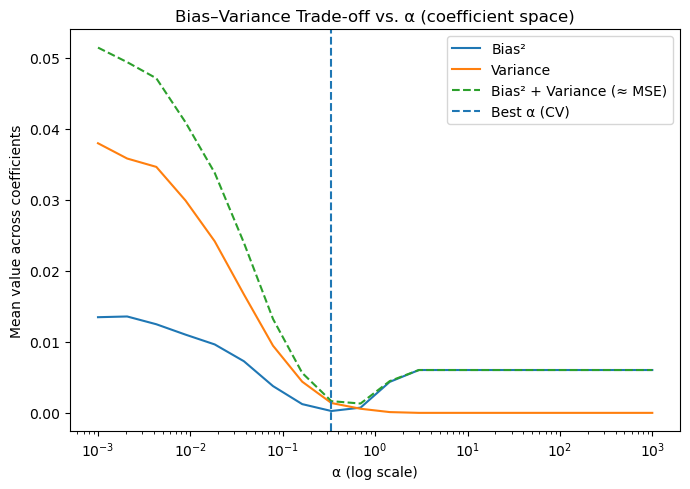

Best alpha (CV): 0.3359818286283781
Bias² min alpha: 0.3359818286283781
Variance min alpha: 2.976351441631316
Sum min alpha: 0.6951927961775606


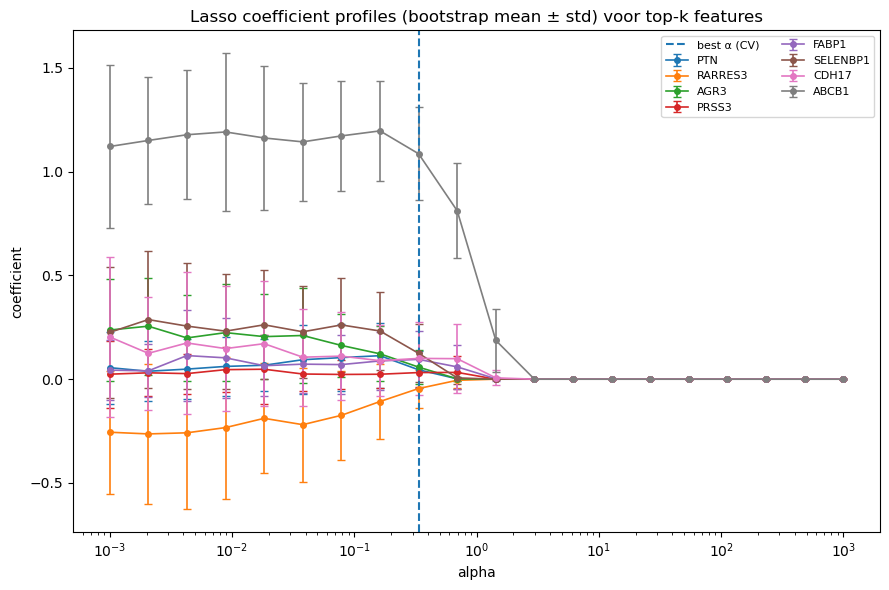

In [209]:

# Bias–Variance trade-off (averaged across coefficients)
plt.figure(figsize=(7,5))
plt.semilogx(res["alphas"], res["mean_bias_sq"], label="Bias²")
plt.semilogx(res["alphas"], res["mean_var"],     label="Variance")
plt.semilogx(res["alphas"], res["mse_params"],   linestyle="--", label="Bias² + Variance (≈ MSE)")
plt.axvline(best_alpha, linestyle="--", label="Best α (CV)")
plt.title("Bias–Variance Trade-off vs. α (coefficient space)")
plt.xlabel("α (log scale)")
plt.ylabel("Mean value across coefficients")
plt.legend()
plt.tight_layout()
plt.show()


# Print summary values for bias-variance analysis
print(f"Best alpha (CV): {best_alpha}")
print(f"Bias² min alpha: {alpha_grid[np.argmin(mean_bias_sq)]}")
print(f"Variance min alpha: {alpha_grid[np.argmin(mean_var)]}")
print(f"Sum min alpha: {alpha_grid[np.argmin(mean_bias_sq + mean_var)]}")

plt.figure(figsize=(9,6))
for j, lbl in enumerate(top_labels):
    plt.errorbar(
        alpha_grid,
        mean_coef_top[:, j],
        yerr=std_coef_top[:, j],
        fmt='-o', capsize=3, linewidth=1.2, markersize=4, label=lbl
    )
plt.axvline(best_alpha, linestyle="--", label="best α (CV)")
plt.xscale("log")
plt.title("Lasso coefficient profiles (bootstrap mean ± std) voor top-k features")
plt.xlabel("alpha"); plt.ylabel("coefficient")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

At small α the coefficients fluctuate strongly across bootstrap samples, indicating high variance, while bias² remains low. With stronger regularization, variance decreases and error bars shrink, but bias² increases as coefficients are systematically driven toward zero. The trade-off is minimized around α ≈ 0.335, close to the CV-selected value, illustrating the optimal balance between bias and variance. Coefficients that persist longer before shrinking to zero appear more stable and are likely to represent true predictive features.

## Logistic regression

Write the expression of the objective function for the penalized logistic regression with  L1 and L2 regularisation (as in Elastic net).